In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [8]:
Data = [[[(i+j)] for i in range (5)]for j in range (100)]
target = [(i+5) for i in range(100)]

In [31]:
Data = np.array(Data, dtype = float)
target = np.array(target, dtype = float)

In [32]:
print "data shape:", Data.shape
print "target shape:", target.shape

data shape: (100, 5, 1)
target shape: (100,)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(Data, target, test_size = 0.2, random_state = 4)

In [34]:
x_train[:4,:,:]

array([[[80.],
        [81.],
        [82.],
        [83.],
        [84.]],

       [[ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.]],

       [[81.],
        [82.],
        [83.],
        [84.],
        [85.]],

       [[76.],
        [77.],
        [78.],
        [79.],
        [80.]]])

In [35]:
y_train[:4]

array([85.,  9., 86., 81.])

In [36]:
x_train, x_test, y_train, y_test = x_train/100, x_test/100, y_train/100, y_test/100

In [37]:
x_train[:4,:,:]

array([[[0.8 ],
        [0.81],
        [0.82],
        [0.83],
        [0.84]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.81],
        [0.82],
        [0.83],
        [0.84],
        [0.85]],

       [[0.76],
        [0.77],
        [0.78],
        [0.79],
        [0.8 ]]])

#### RNN

In [2]:
model = Sequential()

W1206 14:33:37.105715 140544270456576 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [3]:
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences = False))

W1206 14:33:39.531853 140544270456576 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1206 14:33:39.537022 140544270456576 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

W1206 14:33:43.572093 140544270456576 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [6]:
plot_model(model, show_shapes=True, to_file='lstm.png')

In [42]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 0s 462us/step - loss: 0.4181 - acc: 0.0000e+00 - val_loss: 0.3170 - val_acc: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 0s 265us/step - loss: 0.4119 - acc: 0.0000e+00 - val_loss: 0.3115 - val_acc: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 238us/step - loss: 0.4058 - acc: 0.0000e+00 - val_loss: 0.3059 - val_acc: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 229us/step - loss: 0.3996 - acc: 0.0000e+00 - val_loss: 0.3001 - val_acc: 0.0000e+00
Epoch 5/100
80/80 [==============================] - 0s 230us/step - loss: 0.3934 - acc: 0.0000e+00 - val_loss: 0.2943 - val_acc: 0.0000e+00
Epoch 6/100
80/80 [==============================] - 0s 238us/step - loss: 0.3871 - acc: 0.0000e+00 - val_loss: 0.2884 - val_acc: 0.0000e+00
Epoch 7/100
80/80 [==============================] - 0s 238us/step - loss: 0.3809 - acc: 0.0000e+00 - val_loss

In [43]:
results = model.predict(x_test)

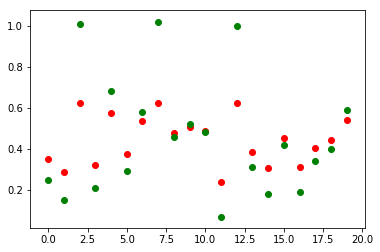

In [44]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

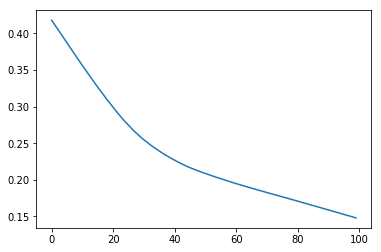

In [45]:
plt.plot(history.history['loss'])
plt.show()

In [9]:
model2 = Sequential()
model2.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences = True))
model2.add(LSTM((1),return_sequences = False))


In [10]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [11]:
plot_model(model2, show_shapes=True, to_file='lstm2.png')

In [51]:
model2.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

In [55]:
history2 = model2.fit(x_train, y_train, epochs = 200, validation_data = (x_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/200
80/80 [==============================] - 0s 634us/step - loss: 0.2028 - acc: 0.0000e+00 - val_loss: 0.2102 - val_acc: 0.0500
Epoch 2/200
80/80 [==============================] - 0s 322us/step - loss: 0.2021 - acc: 0.0000e+00 - val_loss: 0.2102 - val_acc: 0.0500
Epoch 3/200
80/80 [==============================] - 0s 315us/step - loss: 0.2014 - acc: 0.0000e+00 - val_loss: 0.2103 - val_acc: 0.0500
Epoch 4/200
80/80 [==============================] - 0s 365us/step - loss: 0.2007 - acc: 0.0000e+00 - val_loss: 0.2104 - val_acc: 0.0500
Epoch 5/200
80/80 [==============================] - 0s 349us/step - loss: 0.2000 - acc: 0.0000e+00 - val_loss: 0.2103 - val_acc: 0.0500
Epoch 6/200
80/80 [==============================] - 0s 352us/step - loss: 0.1993 - acc: 0.0000e+00 - val_loss: 0.2102 - val_acc: 0.0500
Epoch 7/200
80/80 [==============================] - 0s 346us/step - loss: 0.1986 - acc: 0.0000e+00 - val_loss: 0.2099 - val_acc: 0.05

80/80 [==============================] - 0s 350us/step - loss: 0.0185 - acc: 0.0000e+00 - val_loss: 0.0218 - val_acc: 0.0500
Epoch 120/200
80/80 [==============================] - 0s 351us/step - loss: 0.0184 - acc: 0.0000e+00 - val_loss: 0.0218 - val_acc: 0.0500
Epoch 121/200
80/80 [==============================] - 0s 353us/step - loss: 0.0184 - acc: 0.0000e+00 - val_loss: 0.0215 - val_acc: 0.0500
Epoch 122/200
80/80 [==============================] - 0s 353us/step - loss: 0.0183 - acc: 0.0000e+00 - val_loss: 0.0210 - val_acc: 0.0500
Epoch 123/200
80/80 [==============================] - 0s 348us/step - loss: 0.0181 - acc: 0.0000e+00 - val_loss: 0.0215 - val_acc: 0.0500
Epoch 124/200
80/80 [==============================] - 0s 352us/step - loss: 0.0182 - acc: 0.0000e+00 - val_loss: 0.0217 - val_acc: 0.0500
Epoch 125/200
80/80 [==============================] - 0s 347us/step - loss: 0.0181 - acc: 0.0000e+00 - val_loss: 0.0207 - val_acc: 0.0500
Epoch 126/200
80/80 [====================

80/80 [==============================] - 0s 360us/step - loss: 0.0157 - acc: 0.0000e+00 - val_loss: 0.0183 - val_acc: 0.0500
Epoch 179/200
80/80 [==============================] - 0s 344us/step - loss: 0.0158 - acc: 0.0000e+00 - val_loss: 0.0189 - val_acc: 0.0500
Epoch 180/200
80/80 [==============================] - 0s 357us/step - loss: 0.0157 - acc: 0.0000e+00 - val_loss: 0.0187 - val_acc: 0.0500
Epoch 181/200
80/80 [==============================] - 0s 349us/step - loss: 0.0156 - acc: 0.0000e+00 - val_loss: 0.0182 - val_acc: 0.0500
Epoch 182/200
80/80 [==============================] - 0s 353us/step - loss: 0.0157 - acc: 0.0000e+00 - val_loss: 0.0181 - val_acc: 0.0500
Epoch 183/200
80/80 [==============================] - 0s 357us/step - loss: 0.0156 - acc: 0.0000e+00 - val_loss: 0.0181 - val_acc: 0.0500
Epoch 184/200
80/80 [==============================] - 0s 356us/step - loss: 0.0157 - acc: 0.0000e+00 - val_loss: 0.0182 - val_acc: 0.0500
Epoch 185/200
80/80 [====================

In [56]:
results2 = model2.predict(x_test)

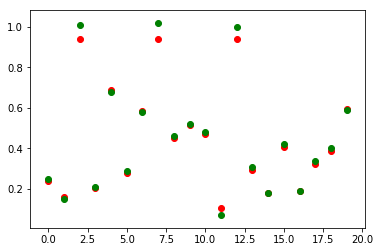

In [57]:
plt.scatter(range(20),results2,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()